# Import Libraries

In [83]:
import os
import numpy as np
import pandas as pd
import sybil_functions
import importlib
from datetime import datetime
from tqdm import tqdm
import requests
from time import sleep
import matplotlib.pyplot as plt
import random

importlib.reload(sybil_functions)

from sybil_functions import (
    read_from_multiple_csv,
    check_df,
    count_pairs,
    remove_contract_transactions,
    stretched_sigmoid,
    get_weight_df,
    plot_weight_dist,
    plot_weight_cumulative_dist,
    create_community,
    community_visualization,
    file_name_lst,
    random_rate,
    find_main_wallet,
    find_transfer_for_wallet,
    find_commu_for_wallet,
    uncommon_wallets,
    filter_community_lst,
    expand_community_lst
)

In [74]:
os.getcwd()

'/Users/floras/Desktop/unique-user'

In [75]:
# set the path to the focal repository
os.chdir('/Users/floras/Desktop/unique-user')

# Import data

# Contract data

In [146]:
known_contract = read_from_multiple_csv(
    "contract-data",
    file_name_lst("contract-data", startswith="contract", endswith="moca_airdrop.csv"),
)
print(known_contract.shape)
known_contract.head()

(31, 4)


,address,contract/public account,sus,note
0,0x76dd65529dc6c073c1e0af2a5ecc78434bdbf7d9,y,NaN,NaN
1,0xe50ddf54c958a63ec1f2ab4fd48c899de7bfaa0b,NaN,y,"high-frequency in on polygon, mainly from 0x29..."
2,0x9008d19f58aabd9ed0d60971565aa8510560ab41,y,NaN,NaN
3,0x9a98e6b60784634ae273f2fb84519c7f1885aed2,y,NaN,moca staking
4,0xdc066677b5ee2c577132b69ac13da6cf8a50c1c7,y,NaN,NaN


## White list

In [147]:
known_white = read_from_multiple_csv(
    "white-data",
    file_name_lst("white-data", startswith="white", endswith="moca_airdrop.csv"),
)
white_set = set(known_white["address"])
print(known_white.shape)
known_white.head()

(122, 2)


,address,Unnamed: 1
0,0xba1c4b823a1d9ba7c8e3012d6ec4f57d7ddfe501,NaN
1,0xdd3d60296fd6c7e57fbe7d67472f708c178f4d29,NaN
2,0x31ea111ebe1963d409ae5731d8bb58975a4e187c,NaN
3,0xf8e9263f3e4485900634757ed34288d656cd3c99,NaN
4,0xda2495e2ee77469a471c946e334eed38d0179fd2,NaN


## Moca Airdrop Receiver Info

In [48]:
moca_airdrop_df = pd.read_excel('moca-airdrop/data/moca_airdrop_user_info.xlsx')
moca_airdrop_df.head()

,email,uuid,uuid.1,moca_id,id,name,abstract_account_address,web3auth_wallet_address,address,id.1,uuid.2,user_id
0,NaN,0016e1a3-0cdf-475b-b921-2d121453bece,0016e1a3-0cdf-475b-b921-2d121453bece,kppytiuynykiboo,7418689.0,kppytiuynykiboo,0x4b5591379a65c0180103f421cce640c679d1d9d8,0xc0f32955a9b37e6c1fa235a4f330c2d23545af88,0xc0f32955a9b37e6c1fa235a4f330c2d23545af88,590112.0,2d45d118-3d6f-4c7f-930d-5c9f3d56f612,7418689.0
1,semidmitrii@gmail.com,00284435-f796-45ad-8c61-5cf4a5417043,00284435-f796-45ad-8c61-5cf4a5417043,therock,25939.0,therock,0x3f1f1694941ebea878fe9e88b048dcb6f0c8f07b,0x5335b140366404b2bd875339322de16f9cd9651c,0xe23308c15434f903825112035cc1d26914fab078,60816.0,6ee964db-f14c-49ad-84db-84d937463cb3,25939.0
2,NaN,0048b42e-7630-42a2-9633-9ee78c35f2eb,0048b42e-7630-42a2-9633-9ee78c35f2eb,mocae,7361874.0,mocae,0x38c24c4158033ef3967f102748cba1d56079bd31,0x9c590bb4e0ffb4c9adfc03dfa2ee2484502ce067,0x9c590bb4e0ffb4c9adfc03dfa2ee2484502ce067,43567.0,5cbe41a2-b90c-43cb-9560-af5cb0cb2b2f,7361874.0
3,NaN,00799be0-8c24-4f0b-a442-bbb1279a63d3,00799be0-8c24-4f0b-a442-bbb1279a63d3,accelerando,8000019.0,accelerando,0xd86b10033c4d718b9b5f330ab270cd17c31cba97,0xaa6c6d0ed231da328814c2b7853d2e4350b70000,0xaa6c6d0ed231da328814c2b7853d2e4350b70000,294969.0,182f98d8-9098-4763-be3d-4e47985beb8f,8000019.0
4,NaN,00799be0-8c24-4f0b-a442-bbb1279a63d3,00799be0-8c24-4f0b-a442-bbb1279a63d3,accelerando,8000019.0,accelerando,0xd86b10033c4d718b9b5f330ab270cd17c31cba97,0xaa6c6d0ed231da328814c2b7853d2e4350b70000,0xd1f01c4bc479967f4dbde0a73f961dd14afa524f,343872.0,abe31f57-dcd4-4bec-a434-414e2c0d2181,8000019.0


In [49]:
wallet_lst = moca_airdrop_df["address"]
wallet_lst = wallet_lst.str.lower()
wallet_set = set(wallet_lst)

## Native token transfer data

In [50]:
native_trans_path = 'moca-airdrop/data/raw-data'

In [51]:
native_trans_file_lst = file_name_lst(
    native_trans_path, startswith="native", endswith=".csv"
)
native_trans_df = read_from_multiple_csv(native_trans_path, native_trans_file_lst)
native_trans_df = native_trans_df[
    native_trans_df["from_address"].isin(wallet_set)
    | native_trans_df["to_address"].isin(wallet_set)
]
native_trans_df = native_trans_df[
    (native_trans_df["from_address"].isna() == False)
    & (native_trans_df["to_address"].isna() == False)
]
native_trans_df.columns = ["timestamp", "from_address", "to_address", "native_tx_count"]
native_trans_df.head()

,timestamp,from_address,to_address,native_tx_count
0,2024-06-01 00:00:00.000 UTC,0xbb14ed78c9fc563e5263bc3502fa86aec887194b,0xca3840c43962aa4857f9237463825071cb7da071,10
1,2024-06-01 00:00:00.000 UTC,0xf36f26f3d31f58772c99321fafed6729c3f47f5e,0xa137e8b1ff0339328572bad9c788c23586eaa63c,28
2,2024-06-01 00:00:00.000 UTC,0xda1bbc89a1deeed513363654324a0ebb17946ee0,0x6c5e87309ee7ff13628cc8c8dbb5fbbb4cb7ca5c,29
3,2024-06-01 00:00:00.000 UTC,0xf0cbace7452b530aa18ff0870e3475ec71ba362b,0x95a7f9cd4db3564146599267f7848fe20ad5c59e,1
4,2024-06-01 00:00:00.000 UTC,0xf327d13cd7bc9b3ea7485a97dfbbd0cc998635b8,0x6b1e3ddecc11583ed189b1db217873aa1c65a72e,1


## Moca coin transfer data

In [52]:
moca_trans_path = 'moca-airdrop/data/raw-data'

In [53]:
moca_trans_file_lst = file_name_lst(moca_trans_path, startswith= 'mocacoin', endswith='.csv')
moca_trans_df = read_from_multiple_csv(moca_trans_path, moca_trans_file_lst)
moca_trans_df = moca_trans_df[
    moca_trans_df['from_address'].isin(wallet_set) | moca_trans_df['to_address'].isin(wallet_set)
]
moca_trans_df.columns = ['from_address', 'to_address', 'moca_tx_count']
moca_trans_df

,from_address,to_address,moca_tx_count
0,0x6b22ca1ba7fc8d7f96cdb13ab68f082c27ed78d3,0x4c510f3b6e4190037c24fdb41fcb4c312a42c3e3,2
1,0x02c97159c1b3ca84b919ce26e8fc97150f410413,0x70b4463181ed9a4079d4917327af63cfdac3bc3f,1
2,0x8d25e246a03f9f20444f13576e8fdc6e7f188eca,0x8d25e246a03f9f20444f13576e8fdc6e7f188eca,1
3,0x1629d7c04d64336eb61426d602f530609cb57b75,0x1ea319d90011c17e8f144552f1f75d7a3f8916d6,1
4,0x50c49098c25d69136c0592154b4d5d4c0e1fa84b,0xff85a314a083c947238972aad732814a83c9a4af,1
...,...,...,...
7752,0x9a98e6b60784634ae273f2fb84519c7f1885aed2,0x6b5bdd4dc61ff37d1ac5d5c35b100cd643c4b2da,1
7753,0xeca741697c604b0f7acf3112beb28f07567671bb,0xdaee8684102f80b7c39a7ea300a234bf42a01588,1
7754,0x9a98e6b60784634ae273f2fb84519c7f1885aed2,0x20336a028b81251219ce5342959ed79826cac3f5,1
7755,0x9a98e6b60784634ae273f2fb84519c7f1885aed2,0x2c4be594c174690c22701333d0f96efe3fddc836,1


# Remove contract transactions

In [54]:
# wallet_to_test = list(set(trans_df["from_address"].unique()).union(set(trans_df["to_address"].unique())))
# wallet_to_test = uncommon_wallets(wallet_to_test, balance_df['wallet_address'])
# wallet_to_test = uncommon_wallets(wallet_to_test, known_contract['address'])

# print(len(wallet_to_test))

In [55]:
# # loop through all addresses
# new_found_contract_lst = []

# for i in tqdm(range(494, len(wallet_to_test))):
#     sleep(0.15)
#     address = list(wallet_to_test)[i]
#     # oklink api
#     url = f"https://www.oklink.com/api/v5/explorer/eth/api?module=contract&action=getabi&address={address}"
#     headers = {"Ok-Access-Key": "f0f1e2ec-7e9a-470d-aa0f-a436cc55c2e6"}
#     response = requests.request(method="GET", url=url, headers=headers)
#     response_json = response.json()

#     try:
#         if response_json["status"] == "1":
#             new_found_contract_lst.append(address)
#             print(f"Address: {address}")
#     except:
#         print(f"Error in getting info for: {address}")
#         print(response_json)
#         pass

In [56]:
# # add the new found contract to the end of contract_ape_holder.csv
# new_found_contract_df = pd.DataFrame(new_found_contract_lst, columns=["address"])
# new_found_contract_df.to_csv(
#     "edu/data/processed_data/contract_ape_holder.csv",
#     index=False,
#     mode="a",
#     header=False,
# )

In [148]:
# check size
print('native: ', native_trans_df.shape[0])
print('moca: ', moca_trans_df.shape[0])
print('')

# remove contract transactions
native_trans_df = remove_contract_transactions(native_trans_df, ['from_address', 'to_address'], known_contract['address'])
moca_trans_df = remove_contract_transactions(moca_trans_df, ['from_address', 'to_address'], known_contract['address'])
trans_df = pd.concat([native_trans_df, moca_trans_df], ignore_index=True)

# check size
print('native: ', native_trans_df.shape[0])
print('moca: ', moca_trans_df.shape[0])
print('total: ', trans_df.shape[0])

native:  173703
moca:  3597

native:  173668
moca:  3597
total:  177265


# Get transaction counts

## For native

In [149]:
native_trans_df_count = native_trans_df.copy()
native_trans_df_count["pair"] = native_trans_df_count.apply(
    lambda x: tuple(sorted([x["to_address"], x["from_address"]])), axis=1
)

# Sum the transaction counts for each wallet pair
native_trans_df_count = native_trans_df_count.groupby("pair")["native_tx_count"].sum()
native_trans_df_count = pd.DataFrame(native_trans_df_count)
native_trans_df_count = get_weight_df(native_trans_df_count)
native_trans_df_count = native_trans_df_count.sort_values(
    by="native_tx_count", ascending=False
)

# if no need to check
native_trans_df_count["if_wallet_a"] = native_trans_df_count["wallet_a"].isin(
    wallet_set.union(white_set)
)
native_trans_df_count["if_wallet_b"] = native_trans_df_count["wallet_b"].isin(
    wallet_set.union(white_set)
)

# native_trans_df_count = native_trans_df_count.sort_values(by='tx_count', ascending=False)
native_trans_df_count[
    ~native_trans_df_count["if_wallet_a"] | ~native_trans_df_count["if_wallet_b"]
].head(20)

,pair,native_tx_count,wallet_a,wallet_b,if_wallet_a,if_wallet_b
76288,"(0x7ac79c369a3585b19e068578d37916259e497616, 0...",113,0x7ac79c369a3585b19e068578d37916259e497616,0xaec37292d361417610977045d863500907762712,True,False
14563,"(0x1052a3af2476e5c39a05c07c75135af81ad8cae5, 0...",113,0x1052a3af2476e5c39a05c07c75135af81ad8cae5,0xcae756ac91bdafd828dae5ae6b6c83b8d509583e,False,True
75424,"(0x78aba45e3cc94b7bbf163f34aebfb1d02a2f2308, 0...",110,0x78aba45e3cc94b7bbf163f34aebfb1d02a2f2308,0xb0b50a71b450643188c7bf56ebc2dbe1ee7a3037,True,False
70744,"(0x6fe0c938f6c5059597081a5738407f8610e72cd2, 0...",110,0x6fe0c938f6c5059597081a5738407f8610e72cd2,0xecbce6a0e79c5a3060879fed54dbee62b032250b,False,True
71779,"(0x70e967acfcc17c3941e87562161406d41676fd83, 0...",110,0x70e967acfcc17c3941e87562161406d41676fd83,0xcb780246010d14476ef30138cc9dfd4a37099eed,False,True
49123,"(0x45c25565541575a8167495c6ca470310e38c805d, 0...",109,0x45c25565541575a8167495c6ca470310e38c805d,0xfcfefaadf519499bd661fce55918a244d334c500,True,False
97122,"(0xbe5072933fca2523ea9b060937c4b784405933dc, 0...",107,0xbe5072933fca2523ea9b060937c4b784405933dc,0xf9329d35fd7a87e2aa87a51acd4863dc50be0d4c,True,False
97348,"(0xbf66ed3c3fde88f2ca462b218755ea46258e543c, 0...",106,0xbf66ed3c3fde88f2ca462b218755ea46258e543c,0xf21dfbf90dab607635291120aa4577f3c0b04d0c,False,True
28106,"(0x23ee9f950168b5b8938e09b2f07e08b9a7a70d79, 0...",105,0x23ee9f950168b5b8938e09b2f07e08b9a7a70d79,0xdf8dd5e0b4168f20a3488ad088ddb198fe602cb3,True,False
24336,"(0x1e8958b0771533c95407c40a45f913d945e0b7db, 0...",105,0x1e8958b0771533c95407c40a45f913d945e0b7db,0xa4446eb85b69fca6c2cb50b3eb235f5e299a4bde,False,True


## For MocaCoin

In [131]:
moca_trans_df_count = moca_trans_df.copy()
moca_trans_df_count['pair'] = moca_trans_df_count.apply(lambda x: tuple(sorted([x['to_address'], x['from_address']])), axis=1)

# Sum the transaction counts for each wallet pair
moca_trans_df_count = moca_trans_df_count.groupby('pair')['moca_tx_count'].sum()
moca_trans_df_count = pd.DataFrame(moca_trans_df_count)
moca_trans_df_count = get_weight_df(moca_trans_df_count)
moca_trans_df_count = moca_trans_df_count.sort_values(by='moca_tx_count', ascending=False)

# if no need to check
moca_trans_df_count['if_wallet_a'] = moca_trans_df_count["wallet_a"].isin(wallet_set.union(white_set))
moca_trans_df_count['if_wallet_b'] = moca_trans_df_count["wallet_b"].isin(wallet_set.union(white_set))

# pol_trans_df_count = pol_trans_df_count.sort_values(by='tx_count', ascending=False)
moca_trans_df_count[~moca_trans_df_count['if_wallet_a'] | ~moca_trans_df_count['if_wallet_b']].head(20)

,pair,moca_tx_count,wallet_a,wallet_b,if_wallet_a,if_wallet_b
1412,"(0x3bbded7132c61a703f9138a10fd177f0796b6696, 0...",2,0x3bbded7132c61a703f9138a10fd177f0796b6696,0x84d0b41a207cec5789ed80e56f4aa6117b8cee31,True,False
3400,"(0xc96142621324944e8d252fa728afde40e9b6b746, 0...",2,0xc96142621324944e8d252fa728afde40e9b6b746,0xf674b13b3857becce7e63c3eaed3b14374df10d0,False,True
3384,"(0xc57cea334455d5f505d4dc86ae7051c5aa77ccd8, 0...",2,0xc57cea334455d5f505d4dc86ae7051c5aa77ccd8,0xf5ad3d816c0a0e440881893185afd7eac04fb6e0,False,True
1650,"(0x48c6ceabadc0bce0477b32272f74831bc1854f3d, 0...",2,0x48c6ceabadc0bce0477b32272f74831bc1854f3d,0xf3b802a231b37c0d859fe6d8425f0eac43041ae9,True,False
214,"(0x07acd0ff6031800f3624f994535dea410ef97174, 0...",2,0x07acd0ff6031800f3624f994535dea410ef97174,0x2cf3e272716a2a7fc2295cde83be23779f702b84,True,False
1483,"(0x3fc442bf10433f76bb5e965501713c3c4817bd34, 0...",2,0x3fc442bf10433f76bb5e965501713c3c4817bd34,0xdee61d124f751b8577fddd77499743197b28a77d,False,True
2177,"(0x65cccf23a99b0163dfe279d35b83194b83633807, 0...",2,0x65cccf23a99b0163dfe279d35b83194b83633807,0xcf50c596eafbfbf301f3a9983189ecdb78200301,True,False
3206,"(0xb83044bf3e10f87da3ab86c28782e40658bf210f, 0...",2,0xb83044bf3e10f87da3ab86c28782e40658bf210f,0xdfb225dcd2571a660ba1536568229f73650f0a95,False,True
418,"(0x1111111254eeb25477b68fb85ed929f73a960582, 0...",2,0x1111111254eeb25477b68fb85ed929f73a960582,0xf1d0e6348d64d287288b5518911a816e3361cb1f,False,True
2021,"(0x5d3f2d8e346d576c132b90daef403bebde72062b, 0...",2,0x5d3f2d8e346d576c132b90daef403bebde72062b,0x7f358a7b93e400ec1da67d80a2d9c5238205ad0a,False,True


## Concate and get transaction count again

In [102]:
print(len(eth_trans_df_count))
print(len(pol_trans_df_count))
print(len(bsc_trans_df_count))

trans_df_count = pd.concat(
    [
        eth_trans_df_count[["pair", "tx_count"]],
        pol_trans_df_count[["pair", "tx_count"]],
        bsc_trans_df_count[["pair", "tx_count"]],
    ],
    ignore_index=True,
)
check_df(trans_df_count)

785402
224844
840631


(1850877, 2)

pair        object
tx_count     int64
dtype: object

,tx_count
count,1.850877e+06
mean,1.917335e+00
std,1.334896e+01
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,1.000000e+00
max,1.426000e+04


,pair,tx_count
0,"(0xcd27979b2b324ffe020facded12932cb51742801, 0...",4177
1,"(0x17df0964da0b0d10bc220043b4ea643e7fe60802, 0...",1930
2,"(0x2a45907f94df93388801ae72fe810eac75926a1d, 0...",1475
3,"(0xa760c65ee687c854c9f20d90d9e5c7d27eb742b8, 0...",1404
4,"(0xa29e963992597b21bcdcaa969d571984869c4ff5, 0...",1118


In [103]:
trans_df_count = trans_df_count.groupby('pair')['tx_count'].sum()
trans_df_count = pd.DataFrame(trans_df_count)
trans_df_count = get_weight_df(trans_df_count)

# if in holder lst
trans_df_count['if_wallet_a'] = trans_df_count["wallet_a"].isin(holder_set)
trans_df_count['if_wallet_b'] = trans_df_count["wallet_b"].isin(holder_set)

trans_df_count = trans_df_count.sort_values(by='tx_count', ascending=False)

In [104]:
check_df(trans_df_count)

(1797484, 6)

pair           object
tx_count        int64
wallet_a       object
wallet_b       object
if_wallet_a      bool
if_wallet_b      bool
dtype: object

,tx_count
count,1.797484e+06
mean,1.974288e+00
std,1.364017e+01
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,1.000000e+00
max,1.426000e+04


,pair,tx_count,wallet_a,wallet_b,if_wallet_a,if_wallet_b
1279795,"(0x6170c630dcfc4e3390bcbfdba51e535b9de3c688, 0...",14260,0x6170c630dcfc4e3390bcbfdba51e535b9de3c688,0xb9e99180f5516d0f8232098d4ff790d158b62849,True,False
1751753,"(0xcd27979b2b324ffe020facded12932cb51742801, 0...",4177,0xcd27979b2b324ffe020facded12932cb51742801,0xd1305fbda97c035f86fdaa7785fb568c203174e1,False,True
1213416,"(0x57da35749ed924f6c319cbac023edc9d0b08414f, 0...",3842,0x57da35749ed924f6c319cbac023edc9d0b08414f,0xbee5d2c784937997c0fe94fc97cf10e07f062513,True,False
299942,"(0x17df0964da0b0d10bc220043b4ea643e7fe60802, 0...",1930,0x17df0964da0b0d10bc220043b4ea643e7fe60802,0xcfbba243c567738c2d3d958026b1bf6ad894a19e,False,True
180826,"(0x0a6c69327d517568e6308f1e1cd2fd2b2b3cd4bf, 0...",1564,0x0a6c69327d517568e6308f1e1cd2fd2b2b3cd4bf,0x6af484eabbcf3cbdf603df87d3ace75de13c28f3,True,False


# Transaction count -> Weight

In [105]:
# set sigmoid parameters
stretch = 1

In [106]:
weight_df = trans_df_count.copy()

# Revise the if_wallet_a and if_wallet_b columns
weight_df["if_wallet_a"] = weight_df["wallet_a"].isin(holder_set)
weight_df["if_wallet_b"] = weight_df["wallet_b"].isin(holder_set)

# Calculate the internal weight 
weight_df["internal_weight"] = weight_df.apply(
    lambda x: stretched_sigmoid(x["tx_count"], stretch) 
    if x["if_wallet_a"] and x["if_wallet_b"] else 0, axis=1
)

# Calculate the total weight
weight_df["weight"] = weight_df.apply(
    lambda x: stretched_sigmoid(x["tx_count"], stretch) 
    # + x["internal_weight"]
   , axis=1
)

# Sort based on weight
weight_df = weight_df.sort_values(by="weight", ascending=False)

In [107]:
check_df(weight_df)

(1797484, 8)

pair                object
tx_count             int64
wallet_a            object
wallet_b            object
if_wallet_a           bool
if_wallet_b           bool
internal_weight    float64
weight             float64
dtype: object

,tx_count,internal_weight,weight
count,1.797484e+06,1.797484e+06,1.797484e+06
mean,1.974288e+00,5.385879e-03,7.715967e-01
std,1.364017e+01,6.649415e-02,8.386315e-02
min,1.000000e+00,0.000000e+00,7.310586e-01
25%,1.000000e+00,0.000000e+00,7.310586e-01
50%,1.000000e+00,0.000000e+00,7.310586e-01
75%,1.000000e+00,0.000000e+00,7.310586e-01
max,1.426000e+04,1.000000e+00,1.000000e+00


,pair,tx_count,wallet_a,wallet_b,if_wallet_a,if_wallet_b,internal_weight,weight
1279795,"(0x6170c630dcfc4e3390bcbfdba51e535b9de3c688, 0...",14260,0x6170c630dcfc4e3390bcbfdba51e535b9de3c688,0xb9e99180f5516d0f8232098d4ff790d158b62849,True,False,0.0,1.0
1418277,"(0x77e7c5cbeaad915cf5462064b02984e16a902e67, 0...",44,0x77e7c5cbeaad915cf5462064b02984e16a902e67,0x99393b0883fe0deda0f84313df5521c3e79b4a51,True,False,0.0,1.0
1425129,"(0x77e7c5cbeaad915cf5462064b02984e16a902e67, 0...",44,0x77e7c5cbeaad915cf5462064b02984e16a902e67,0xa703f645778b6c8cf995f31798009b9effcadb5c,True,False,0.0,1.0
1466083,"(0x77e7c5cbeaad915cf5462064b02984e16a902e67, 0...",44,0x77e7c5cbeaad915cf5462064b02984e16a902e67,0xf8fe9cb3bf9258cdfa20af607c72fdabb6429aa5,True,False,0.0,1.0
1416508,"(0x77e7c5cbeaad915cf5462064b02984e16a902e67, 0...",44,0x77e7c5cbeaad915cf5462064b02984e16a902e67,0x95d287307db8c6b65e96eb83f18e372e45b7178a,True,False,0.0,1.0


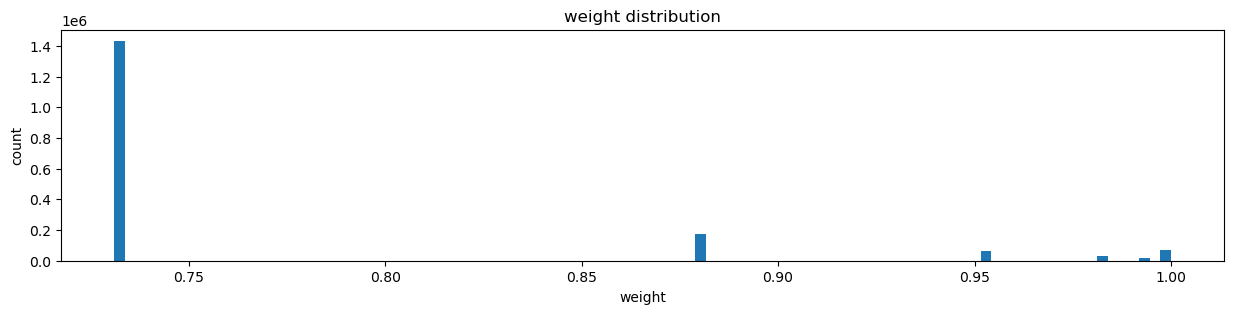

In [108]:
plot_weight_dist(weight_df)

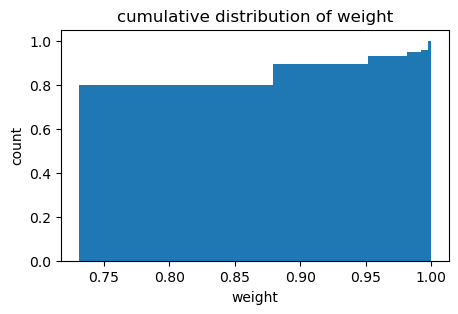

In [109]:
plot_weight_cumulative_dist(weight_df)

# Weight -> Community

In [110]:
community_lst_lou = create_community(weight_df, "louvain", resolution=1)
# community_lst_s = create_community(weight_df, 'surprise')
# community_lst_lei = create_community(weight_df, 'leiden')

Method: louvain
Number of unique wallets: 1786826
Number of edges: 1797484
Number of communities detected: 35220
-
Average community size: 50.73327654741624
Max community size: 468001
Min community size: 1



In [180]:
# row_lst = range(10)
row_lst = [2]
community_lst_visualization_1 = community_lst_lou

for row in row_lst:
    community = community_lst_visualization_1[row]
    print("Size of community:", len(community))
    # print(find_main_wallet(community, weight_df))
    
    commu_visual_df_1 = weight_df.loc[
        weight_df["wallet_a"].isin(community) & weight_df["wallet_b"].isin(community)
    ]
    
    print("Average weight:", commu_visual_df_1["weight"].mean())

Size of community: 69152
Average weight: 0.7527565739572052


In [154]:
community_visualization(commu_visual_df_1)

In [113]:
commu_visual_df_1

,pair,tx_count,wallet_a,wallet_b,if_wallet_a,if_wallet_b,internal_weight,weight
850909,"(0x2264783b2ae3cadee4e8a76b8e60dc4af1b1f82b, 0...",2,0x2264783b2ae3cadee4e8a76b8e60dc4af1b1f82b,0xb0e4f65c4e3c9761fe543a4f284b15f63dce0723,True,False,0.0,0.880797
850907,"(0x2264783b2ae3cadee4e8a76b8e60dc4af1b1f82b, 0...",2,0x2264783b2ae3cadee4e8a76b8e60dc4af1b1f82b,0xb0e42d09dfa82b5143b71814c94b1adf2fce0723,True,False,0.0,0.880797
857973,"(0x2264783b2ae3cadee4e8a76b8e60dc4af1b1f82b, 0...",2,0x2264783b2ae3cadee4e8a76b8e60dc4af1b1f82b,0xfceb11354b5096758419de0878d9237e7dcf9edc,True,False,0.0,0.880797
857713,"(0x2264783b2ae3cadee4e8a76b8e60dc4af1b1f82b, 0...",2,0x2264783b2ae3cadee4e8a76b8e60dc4af1b1f82b,0xfa59a8be6f9c3f8c6db449cf8cfeeee8a07e13bb,True,False,0.0,0.880797
857711,"(0x2264783b2ae3cadee4e8a76b8e60dc4af1b1f82b, 0...",2,0x2264783b2ae3cadee4e8a76b8e60dc4af1b1f82b,0xfa592cbed5ff2dd942472c5e8cb8727afa5f13bb,True,False,0.0,0.880797
...,...,...,...,...,...,...,...,...
384515,"(0x1ec1836185eb7035dbcbbddf11be0d0b72792cc6, 0...",1,0x1ec1836185eb7035dbcbbddf11be0d0b72792cc6,0x2264783b2ae3cadee4e8a76b8e60dc4af1b1f82b,False,True,0.0,0.731059
384488,"(0x1ec06b8d8dbe7ff63c7e4e8b4d81cafdd8d259d2, 0...",1,0x1ec06b8d8dbe7ff63c7e4e8b4d81cafdd8d259d2,0x2264783b2ae3cadee4e8a76b8e60dc4af1b1f82b,False,True,0.0,0.731059
384570,"(0x1ec360a93e02287bb8e799acf084834173a8ade6, 0...",1,0x1ec360a93e02287bb8e799acf084834173a8ade6,0x2264783b2ae3cadee4e8a76b8e60dc4af1b1f82b,False,True,0.0,0.731059
385096,"(0x1ed58aaf45fcc6c638362b90fb7b22846cffa990, 0...",1,0x1ed58aaf45fcc6c638362b90fb7b22846cffa990,0x2264783b2ae3cadee4e8a76b8e60dc4af1b1f82b,False,True,0.0,0.731059


In [114]:
test_main_wallet = '0xe9718e8221807be2c898f5655c6d97a25c16fa9e'
commu_visual_df_1[
    (commu_visual_df_1["wallet_a"] != test_main_wallet)
    & (commu_visual_df_1["wallet_b"] != test_main_wallet)
]

,pair,tx_count,wallet_a,wallet_b,if_wallet_a,if_wallet_b,internal_weight,weight
850909,"(0x2264783b2ae3cadee4e8a76b8e60dc4af1b1f82b, 0...",2,0x2264783b2ae3cadee4e8a76b8e60dc4af1b1f82b,0xb0e4f65c4e3c9761fe543a4f284b15f63dce0723,True,False,0.0,0.880797
850907,"(0x2264783b2ae3cadee4e8a76b8e60dc4af1b1f82b, 0...",2,0x2264783b2ae3cadee4e8a76b8e60dc4af1b1f82b,0xb0e42d09dfa82b5143b71814c94b1adf2fce0723,True,False,0.0,0.880797
857973,"(0x2264783b2ae3cadee4e8a76b8e60dc4af1b1f82b, 0...",2,0x2264783b2ae3cadee4e8a76b8e60dc4af1b1f82b,0xfceb11354b5096758419de0878d9237e7dcf9edc,True,False,0.0,0.880797
857713,"(0x2264783b2ae3cadee4e8a76b8e60dc4af1b1f82b, 0...",2,0x2264783b2ae3cadee4e8a76b8e60dc4af1b1f82b,0xfa59a8be6f9c3f8c6db449cf8cfeeee8a07e13bb,True,False,0.0,0.880797
857711,"(0x2264783b2ae3cadee4e8a76b8e60dc4af1b1f82b, 0...",2,0x2264783b2ae3cadee4e8a76b8e60dc4af1b1f82b,0xfa592cbed5ff2dd942472c5e8cb8727afa5f13bb,True,False,0.0,0.880797
...,...,...,...,...,...,...,...,...
384515,"(0x1ec1836185eb7035dbcbbddf11be0d0b72792cc6, 0...",1,0x1ec1836185eb7035dbcbbddf11be0d0b72792cc6,0x2264783b2ae3cadee4e8a76b8e60dc4af1b1f82b,False,True,0.0,0.731059
384488,"(0x1ec06b8d8dbe7ff63c7e4e8b4d81cafdd8d259d2, 0...",1,0x1ec06b8d8dbe7ff63c7e4e8b4d81cafdd8d259d2,0x2264783b2ae3cadee4e8a76b8e60dc4af1b1f82b,False,True,0.0,0.731059
384570,"(0x1ec360a93e02287bb8e799acf084834173a8ade6, 0...",1,0x1ec360a93e02287bb8e799acf084834173a8ade6,0x2264783b2ae3cadee4e8a76b8e60dc4af1b1f82b,False,True,0.0,0.731059
385096,"(0x1ed58aaf45fcc6c638362b90fb7b22846cffa990, 0...",1,0x1ed58aaf45fcc6c638362b90fb7b22846cffa990,0x2264783b2ae3cadee4e8a76b8e60dc4af1b1f82b,False,True,0.0,0.731059


# Filter and expand 

In [115]:
filtered_list = community_lst_visualization_1
print('filtering ...')
filtered_list = filter_community_lst(filtered_list, holder_lst)
print('expanding ...')
filtered_list = expand_community_lst(filtered_list, holder_lst)
filtered_list = [commu for commu in filtered_list if len(commu) >= 1]

filtering ...
expanding ...


In [116]:
display(len(filtered_list))
display(sum([len(x) for x in filtered_list]))
display(len(holder_lst))

137646

161936

161936

In [117]:
display(np.argmax([len(x) for x in filtered_list]))

23

# Calculate community balance

In [118]:
balance_df.head(10)

,wallet_address,ape_amount,first_txn_time,total_native_token_balance,total_stable_coin_balance,total_balance
0,0x47ac0fb4f2d84898e4d9e7b4dab3c24507a6d503,11635660.83,"July 26, 2023",1.429268e+09,2.400255e+09,3.829523e+09
1,0x5a52e96bacdabb82fd05763e25335261b270efcb,0.00,"July 2, 2023",1.698934e+08,1.859143e+09,2.029036e+09
2,0x28c6c06298d514db089934071355e5743bf21d60,11391064.41,"July 1, 2023",3.087157e+08,1.206835e+09,1.515551e+09
3,0x40ec5b33f54e0e8a33a975908c5ba1c14e5bbbdf,465786.39,"December 28, 2023",1.750000e+00,1.501528e+09,1.501528e+09
4,0x99c9fc46f92e8a1c0dec1b1747d010903e884be1,236.13,"July 10, 2023",3.090000e+01,1.306704e+09,1.306704e+09
5,0xc882b111a75c0c657fc507c04fbfcd2cc984f071,285676.93,"July 28, 2023",3.098828e+08,5.346971e+08,8.445799e+08
6,0xd6216fc19db775df9774a6e33526131da7d19a2c,6079209.70,"July 3, 2023",2.496613e+08,5.558092e+08,8.054705e+08
7,0xafcd96e580138cfa2332c632e66308eacd45c5da,3600030.00,"April 1, 2024",6.772972e+08,2.899686e+07,7.062941e+08
8,0xf3b0073e3a7f747c7a38b36b805247b222c302a3,5520941.78,"July 26, 2023",4.792984e+08,4.965565e+07,5.289540e+08
9,0x94dbf04e273d87e6d9bed68c616f43bf86560c74,1068366.39,"June 28, 2024",4.699141e+08,7.385579e+06,4.772996e+08


In [119]:
# calculate total amount for each community

# Create a dictionary for quick lookup of wallet balances
balance_dict = dict(zip(balance_df["wallet_address"], balance_df["total_balance"]))

commu_info = {
    tuple(community): [
        tuple(indi_balances:= [balance_dict.get(wallet, 0) for wallet in community]),
        sum(indi_balances),
        len(community),
    ]
    for community in filtered_list
}

In [120]:
commu_info_df = pd.DataFrame([
    {'contracts': ', '.join(community), 'indi_balances': info[0], 'total_balance': info[1], 'commu_size': info[2]}
    for community, info in commu_info.items()
])
commu_info_df

,contracts,indi_balances,total_balance,commu_size
0,0x1f8b5416a7847e050af032c7107cff2dd4ca8403,"(8607.42,)",8607.42,1
1,"0x77e7c5cbeaad915cf5462064b02984e16a902e67, 0x...","(181454.26, 0.72, 17.42, 16.58, 1.65, 1178.79,...",195164.32,72
2,"0xfb19ffd1ff9316b7f5bba076ef4b78e4bbedf4e1, 0x...","(93919.56, 149.91, 614.79, 29.98, 164.42, 8673...",3252632.89,662
3,"0x016606acc6b0cfe537acc221e3bf1bb44b4049ee, 0x...","(160382.9, 10.84, 0.87, 0.22, 1102.31, 450.35,...",1126113.91,159
4,"0x9642b23ed1e01df1092b92641051881a322f5d4e, 0x...","(9068466.75, 1430.24, 7.53, 21.16, 78906.83, 1...",9665656.58,312
...,...,...,...,...
137641,0x913713ff6e6df52a2addedb9bac8cdc76aaaa222,"(0.0,)",0.00,1
137642,0xc7e0599b2ea67ea5457d9b7598ff2e98eb984c44,"(0.0,)",0.00,1
137643,0x28448dee61025cc1097e21e14de26de70b2b33d8,"(0.0,)",0.00,1
137644,0xb1dc958ff9d8f38045e9224f95fd0d332bcd9b26,"(0.0,)",0.00,1


In [121]:
print(len(balance_df))
print(len(commu_info_df))
print(commu_info_df['commu_size'].sum())

161936
137646
161936


# Visualizations

In [122]:
balance_df['total_balance'].describe()

count    1.619360e+05
mean     1.230892e+05
std      1.317517e+07
min      0.000000e+00
25%      4.000000e-01
50%      1.922000e+01
75%      1.737125e+02
max      3.829523e+09
Name: total_balance, dtype: float64

In [123]:
commu_info_df['total_balance'].describe()

count    1.376460e+05
mean     1.448104e+05
std      1.437731e+07
min      0.000000e+00
25%      2.200000e-01
50%      1.629500e+01
75%      1.524675e+02
max      3.829523e+09
Name: total_balance, dtype: float64

## Same range for wallets and communities

In [124]:
low = 1e6
high = 5e6
visual_wallet = balance_df[
    (balance_df["total_balance"] >= low) & (balance_df["total_balance"] < high)
]
visual_commu = commu_info_df[
    (commu_info_df["total_balance"] >= low) & (commu_info_df["total_balance"] < high)
]

In [125]:
print(len(visual_wallet))
print(len(visual_commu))

146
120


In [126]:
def get_visual_wallet_commu_df(low, high, wallet_balance_df, commu_balance_df):
    visual_wallet = wallet_balance_df[
        (wallet_balance_df["total_balance"] >= low) & (wallet_balance_df["total_balance"] < high)
    ]
    visual_commu = commu_balance_df[
        (commu_balance_df["total_balance"] >= low) & (commu_balance_df["total_balance"] < high)
    ]
    return visual_wallet, visual_commu

In [127]:
def gini_index(data):
    if len(data) == 0:
        return None
    sorted_data = np.sort(data)
    n = len(data)
    cumulative = np.cumsum(sorted_data)
    gini = (2 / n) * (np.sum((np.arange(1, n + 1) * sorted_data))) / cumulative[-1] - (n + 1) / n
    return gini.round(5)

In [128]:
def lorenz_curve(data, label, markersize=5, color = 'blue'):
    sorted_data = np.sort(data, axis=0)[::-1]
    indices = np.arange(1, len(sorted_data) + 1)
    plt.plot(indices, sorted_data, marker='o', label=label, markersize=markersize, color = color)

In [141]:
# For each range, get how many wallets are in the range
# Get the total balance in the range
# Get the Gini index for the range
# Get the Lorenz curve for the range
balance_range = [0, 10, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8, np.inf]
range_result = []

for i in range(len(balance_range) - 1):
    visual_wallet, visual_commu = get_visual_wallet_commu_df(
        balance_range[i], balance_range[i + 1], balance_df, commu_info_df
    )
    range_result.append(
        {
            "range": f"{format(balance_range[i],'.0e')} ~ {format(balance_range[i + 1], '.0e')}",
            "wallet_count": len(visual_wallet),
            "commu_count": len(visual_commu),
            "wallet_tied_to_commu": visual_commu["commu_size"].sum(),
            "total_balance": visual_wallet["total_balance"].sum(),
            "commu_balance": visual_commu["total_balance"].sum(),
            "wallet_gini": gini_index(visual_wallet["total_balance"]),
            "commu_gini": gini_index(visual_commu["total_balance"]),
        }
    )

In [144]:
range_result_df = pd.DataFrame(range_result)
display(range_result_df)

print(range_result_df['wallet_count'].sum())
print(range_result_df['wallet_tied_to_commu'].sum())
print(range_result_df['total_balance'].sum())
print(range_result_df['commu_balance'].sum())

,range,wallet_count,commu_count,wallet_tied_to_commu,total_balance,commu_balance,wallet_gini,commu_gini
0,0e+00 ~ 1e+01,71028,62904,63499,1.038787e+05,8.518716e+04,0.74927,0.76652
1,1e+01 ~ 1e+02,41217,34228,35004,1.654607e+06,1.374819e+06,0.33111,0.32773
2,1e+02 ~ 1e+03,27830,22419,24028,9.438995e+06,7.570777e+06,0.37231,0.37400
3,1e+03 ~ 1e+04,15437,12766,13414,5.342566e+07,4.449284e+07,0.35838,0.35759
4,1e+04 ~ 1e+05,5254,4392,4831,1.531970e+08,1.272272e+08,0.36255,0.36132
5,1e+05 ~ 1e+06,882,695,3668,2.402235e+08,1.865171e+08,0.37353,0.37957
6,1e+06 ~ 1e+07,185,155,11224,6.043614e+08,5.168168e+08,0.37090,0.38974
7,1e+07 ~ 1e+08,78,62,2504,2.695139e+09,2.244801e+09,0.38932,0.38408
8,1e+08 ~ inf,25,25,3764,1.617503e+10,1.680369e+10,0.57552,0.55119


161936
161936
19932577309.21
19932577309.21


In [143]:
range_result_df.to_excel('edu/data/processed_data/ape_holder_range_result_df.xlsx', index=False)

Wallet Gini: 0.57552
Community Gini: 0.55119


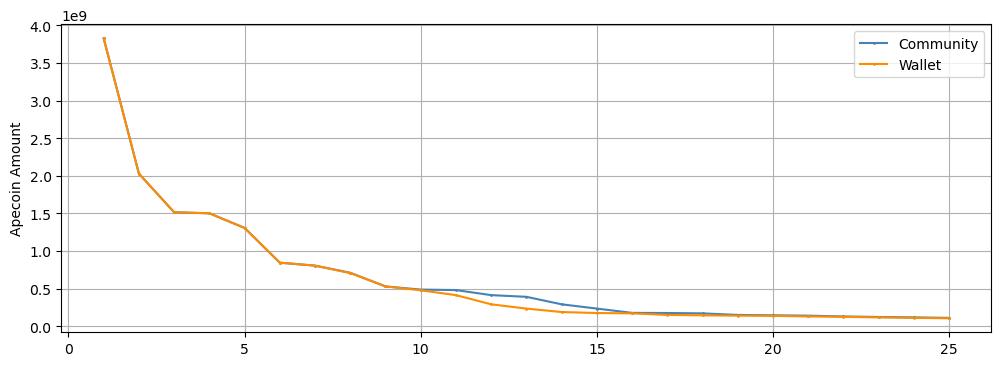

Qualified Wallet:  25
Qualified Community:  25
Wallets involved in Community:  3764


In [131]:
# Plotting
visual_commu_balance = visual_commu['total_balance']
visual_wallet_amount = visual_wallet['total_balance']

print('Wallet Gini:', gini_index(visual_wallet_amount))
print('Community Gini:', gini_index(visual_commu_balance))

plt.figure(figsize=(12, 4))
lorenz_curve(visual_commu_balance, label='Community', markersize = 1, color = 'steelblue')
lorenz_curve(visual_wallet_amount, label='Wallet', markersize = 1, color = 'darkorange')
plt.title('')
plt.ylabel('Apecoin Amount')
plt.legend()
plt.grid(True)
plt.show()

print('Qualified Wallet: ', len(visual_wallet_amount))
print('Qualified Community: ', len(visual_commu_balance))
print('Wallets involved in Community: ', visual_commu['commu_size'].sum())

In [132]:
range_wallet, range_commu = get_visual_wallet_commu_df(
        1e6, 1e7, balance_df, commu_info_df
    )
range_commu.sort_values(by='commu_size', ascending=False)

,contracts,indi_balances,total_balance,commu_size
25,"0xd273aa101de1d0b050f61273acc7db0ce284e8b6, 0x...","(0.09, 0.73, 3.09, 2.73, 261.56, 10.82, 14.64,...",6061956.62,2283
34,"0x3eabd00bfa01d0c9848463f0b2dd3ea038b31c3c, 0x...","(3.93, 1.24, 514749.57, 3.71, 111582.34, 45745...",8794296.96,1498
35,"0x7274d94e28a2e2cd118a73c4792d92d5b8e5f08f, 0x...","(99.51, 56.9, 1.44, 177.29, 446.83, 105.97, 11...",1583601.52,1333
27,"0x27b0b4033b6bdcdf12c8d4b86969e3aee53ca107, 0x...","(4.21, 566.13, 52.62, 3664.31, 50.64, 69.2, 12...",1292292.66,1011
33,"0xb284f19ffa703daadf6745d3c655f309d17370a5, 0x...","(45.01, 280.33, 570.84, 1020.59, 8925.7, 614.4...",5113201.15,794
...,...,...,...,...
34025,0x7fce0734fd4d5fc984dd3666d0f7612313859272,"(1112447.07,)",1112447.07,1
31981,0x1e09a9422506e77e5dbe15140e23878ec8d2d745,"(1552539.84,)",1552539.84,1
30125,0x61260c948952a8d317650b786bddf09e2185b109,"(6850887.19,)",6850887.19,1
29633,0x468e334c8a768d3577bb4ed513e238271a754c1f,"(2013363.08,)",2013363.08,1


# Check Huge community

In [139]:
check_commu = community_lst_visualization_1[0]
print(len(check_commu))

find_main_wallet(check_commu, weight_df)

468001


0x1f8b5416a7847e050af032c7107cff2dd4ca8403    468003.0
0x000002eb68527f7a357fd923829eea9e907b18ff         1.0
0xaa584861f6451b2badc844e966e423eea20dcb5d         1.0
0xaa59ad14ca97adf8522dc6cc0a9afcffc7fda073         1.0
0xaa59729bf8dbdc46db7e0ae70ee5e7e52ef6f151         1.0
                                                ...   
0x550175b9185c98e669521528215c3574bbaead58         1.0
0x550165d9e75215dedcc2a60b2b133276069706df         1.0
0x55015d51c307052c59eaec0899a8dbef0fa238e8         1.0
0x5501540e023a8db411f6dee6ed0937aa0522e5a5         1.0
0xfffffaccd28bfe509ad2a7e77499d471325c5c02         1.0
Length: 468004, dtype: float64

In [138]:
check_wallet = "0x1f8b5416a7847e050af032c7107cff2dd4ca8403"
find_transfer_for_wallet(check_wallet, weight_df)

,pair,tx_count,wallet_a,wallet_b,if_wallet_a,if_wallet_b,internal_weight,weight
533476,"(0x1f8b5416a7847e050af032c7107cff2dd4ca8403, 0...",43,0x1f8b5416a7847e050af032c7107cff2dd4ca8403,0x6dc66b60ef2297895d5f44ade67eb9189041d022,True,False,0.0,1.000000
497191,"(0x1f8b5416a7847e050af032c7107cff2dd4ca8403, 0...",42,0x1f8b5416a7847e050af032c7107cff2dd4ca8403,0x59f338b6aa14d5bbcdfaad34911d552f8f6e3066,True,False,0.0,1.000000
725457,"(0x1f8b5416a7847e050af032c7107cff2dd4ca8403, 0...",42,0x1f8b5416a7847e050af032c7107cff2dd4ca8403,0xd70eb53fad8faa4e5e41bf88ebc7534c0a1ed077,True,False,0.0,1.000000
788002,"(0x1f8b5416a7847e050af032c7107cff2dd4ca8403, 0...",43,0x1f8b5416a7847e050af032c7107cff2dd4ca8403,0xf94f18164a9a6cbc9477743c743133326ae0b033,True,False,0.0,1.000000
421510,"(0x1f8b5416a7847e050af032c7107cff2dd4ca8403, 0...",43,0x1f8b5416a7847e050af032c7107cff2dd4ca8403,0x30963f4c69f749162f60090ae71e4a9b5e73e011,True,False,0.0,1.000000
...,...,...,...,...,...,...,...,...
385111,"(0x1ed61882b38e2e7ba05cd18d9b64fb920493eb29, 0...",1,0x1ed61882b38e2e7ba05cd18d9b64fb920493eb29,0x1f8b5416a7847e050af032c7107cff2dd4ca8403,False,True,0.0,0.731059
385112,"(0x1ed62097c7cbe4fe6b17adfe446097e8725ff5f3, 0...",1,0x1ed62097c7cbe4fe6b17adfe446097e8725ff5f3,0x1f8b5416a7847e050af032c7107cff2dd4ca8403,False,True,0.0,0.731059
385032,"(0x1ed43ae909fed9c4b9a4c508195afacb9082e304, 0...",1,0x1ed43ae909fed9c4b9a4c508195afacb9082e304,0x1f8b5416a7847e050af032c7107cff2dd4ca8403,False,True,0.0,0.731059
385009,"(0x1ed3622ff7a41e521709a95c2d820016c552b393, 0...",1,0x1ed3622ff7a41e521709a95c2d820016c552b393,0x1f8b5416a7847e050af032c7107cff2dd4ca8403,False,True,0.0,0.731059


In [149]:
balance_df[balance_df['wallet_address'] == '0x1f8b5416a7847e050af032c7107cff2dd4ca8403']

,wallet_address,ape_amount,first_txn_time,total_native_token_balance,total_stable_coin_balance,total_balance
7081,0x1f8b5416a7847e050af032c7107cff2dd4ca8403,287.37,"April 26, 2024",6726.62,1880.8,8607.42


## Flow chart

In [171]:
flow_commu_num = 10
flow_wallets_lst = filtered_list[flow_commu_num]
flow_wallets_set = set(flow_wallets_lst)

In [168]:
check_df(trans_df)

(2950817, 4)

date            object
to_address      object
from_address    object
tx_count         int64
dtype: object

,tx_count
count,2.950817e+06
mean,1.202633e+00
std,2.914177e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,1.000000e+00
max,1.805000e+03


,date,to_address,from_address,tx_count
0,2024-07-29 00:00:00.000 UTC,0x7343490e7d031938f579790d019194b00c7bb3a9,0x016606acc6b0cfe537acc221e3bf1bb44b4049ee,1
1,2024-07-29 00:00:00.000 UTC,0x121a4448405d81730f137b0405d89c4778f81d95,0x04c079bb31deed8391015eed8d6b625a40957058,1
2,2024-07-29 00:00:00.000 UTC,0x40cfad198dd59345adb67b14ad4d4f4fdd7d9f84,0x6fd061c6ddccdc5858c553058d0feb7e0f33875b,1
3,2024-07-12 00:00:00.000 UTC,0xf4971d7e9448ce6ff65ce023d28ff59d8c571f23,0xf268ba27077cf769b45467ff71504e4f90d1b2ce,1
4,2024-07-24 00:00:00.000 UTC,0x47da741e9fada9aff75c0f2df69e9cd2b216b225,0xb34d60295694e298f51d0861798b8940693d8e69,1


In [181]:
flow_trans_df = trans_df[
    (trans_df["from_address"].isin(flow_wallets_set))
    | (trans_df["to_address"].isin(flow_wallets_set))
]
flow_trans_df["from_address"] = flow_trans_df["from_address"].apply(
    lambda x: "external_wallet" if x not in flow_wallets_set else x
)
flow_trans_df["to_address"] = flow_trans_df["to_address"].apply(
    lambda x: "external_wallet" if x not in flow_wallets_set else x
)
check_df(flow_trans_df)

(61633, 4)

date            object
to_address      object
from_address    object
tx_count         int64
dtype: object

,tx_count
count,61633.000000
mean,1.193062
std,0.841102
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,144.000000


,date,to_address,from_address,tx_count
135,2024-07-10 00:00:00.000 UTC,external_wallet,0xbf786d2c25f1373858302efc18aa0a25c9f0bfd9,1
871,2024-07-16 00:00:00.000 UTC,external_wallet,0xbf786d2c25f1373858302efc18aa0a25c9f0bfd9,1
934,2024-07-04 00:00:00.000 UTC,external_wallet,0xbf786d2c25f1373858302efc18aa0a25c9f0bfd9,1
1191,2024-07-16 00:00:00.000 UTC,external_wallet,0xbf786d2c25f1373858302efc18aa0a25c9f0bfd9,1
1192,2024-07-16 00:00:00.000 UTC,external_wallet,0xbf786d2c25f1373858302efc18aa0a25c9f0bfd9,1


In [ ]:
import plotly.graph_objects as go
import plotly.express as px


df = visual_after_commu[["from_index", "to_index", "visual_value"]].copy()

# Create a list of unique nodes
nodes = list(set(df["from_index"]) | set(df["to_index"]))

# Create a mapping from node labels to indices
node_indices = {node: i for i, node in enumerate(nodes)}

# Map from_index and to_index to indices
df["from_index"] = df["from_index"].map(node_indices)
df["to_index"] = df["to_index"].map(node_indices)

# Define colors for each node
colors = px.colors.qualitative.Plotly

# Assign colors based on from_index
link_colors = [colors[i % len(colors)] for i in df["from_index"]]

# Create the chord diagram
fig = go.Figure(
    data=go.Sankey(
        node=dict(
            pad=15, thickness=20, line=dict(color="black", width=0.5), label=nodes
        ),
        link=dict(
            source=df["from_index"],
            target=df["to_index"],
            value=df["visual_value"],
            color=link_colors,
        ),
    )
)

# annotations = [
#     dict(
#         x=1,
#         y=1 - 0.05 * i,
#         xref="paper",
#         yref="paper",
#         text=f"<b>{node}</b>: {index_to_wallet[node]}",
#         showarrow=False,
#         align="left",
#     )
#     for i, node in enumerate(nodes)
# ]


# Update layout for better appearance
fig.update_layout(
    title_text="EDU Sample (After airdrop)",
    font_size=10,
    width=800,
    # annotations=annotations,
)

# Display the plot
fig.show()

## Same wallet sample

In [1]:
low = 1
high = 1e5

In [56]:
trimmed_balance_df = balance_df.copy()
trimmed_balance_df = trimmed_balance_df[
    (trimmed_balance_df["amount"] >= low) & (trimmed_balance_df["amount"] < high)
]
print(len(trimmed_balance_df))

27


In [52]:
trimmed_wallet_set = set(trimmed_balance_df["wallet_address"])

In [53]:
trimmed_commu_info = {
    trimmed_community: [
        tuple(
            indi_balances := [
                balance_dict.get(wallet, 0)
                for wallet in trimmed_community
            ]
        ),
        sum(indi_balances),
        len(trimmed_community),
    ]
    for community in filtered_list
    if (trimmed_community := tuple(wallet for wallet in community if wallet in trimmed_wallet_set))
}

In [54]:
trimmed_commu_info_df = pd.DataFrame([
    {'contracts': ', '.join(community), 'indi_balances': info[0], 'total_balance': info[1], 'commu_size': info[2]}
    for community, info in trimmed_commu_info.items()
])
print(trimmed_commu_info_df['commu_size'].sum())
trimmed_commu_info_df.sort_values(by='total_balance', ascending=False).head(10)

27


,contracts,indi_balances,total_balance,commu_size
0,0x9fcaeaaee969021cc7c4009417c0efb118a4db5b,"(9832832.0,)",9832832.00,1
1,0xfbe9f67c01a3566481d8e3a5d24625f2d9945a08,"(8333335.0,)",8333335.00,1
2,0x623a672180b72bd8bc436f800c60b9106ac2602a,"(5777941.84,)",5777941.84,1
3,0x4cd0b3de6fcf6c25447b351039d42fb24a7e518a,"(5022468.73,)",5022468.73,1
15,0xa852e40a5cb5385e8654b6c11f1ae57cccb4306b,"(5000000.0,)",5000000.00,1
25,0x8fc9a248bbb40729797bec719b8408ccc6a3dd80,"(5000000.0,)",5000000.00,1
24,0x5c9c9b99a726aff63d8468c3a96158488bf1293e,"(5000000.0,)",5000000.00,1
23,0xd76a897d6ab412227d67b7ccb5665f408249198e,"(5000000.0,)",5000000.00,1
22,0x20351f6e6137523ba841d30d5efcbb59903aa66c,"(5000000.0,)",5000000.00,1
21,0x8ebd0756fbd4482df38cd387359748d873e7fe22,"(5000000.0,)",5000000.00,1


Wallet Gini: 0.05743
Community Gini: 0.05743


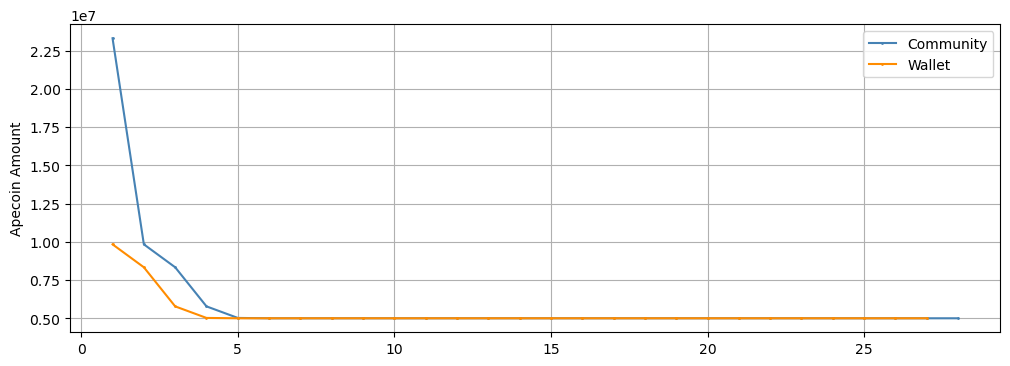

Qualified Wallet:  27
Qualified Community:  27
Wallets involved in Community:  27
Balance in Community:  143966577.57
Balance in Wallet:  143966577.57


In [55]:
# Plotting
visual_trimmed_commu_balance = trimmed_commu_info_df['total_balance']
visual_trimmed_wallet_amount = trimmed_balance_df['amount']

print('Wallet Gini:', gini_index(visual_trimmed_wallet_amount))
print('Community Gini:', gini_index(visual_trimmed_commu_balance))

plt.figure(figsize=(12, 4))
lorenz_curve(visual_commu_balance, label='Community', markersize = 1, color = 'steelblue')
lorenz_curve(visual_wallet_amount, label='Wallet', markersize = 1, color = 'darkorange')
plt.title('')
plt.ylabel('Apecoin Amount')
plt.legend()
plt.grid(True)
plt.show()

print('Qualified Wallet: ', len(visual_trimmed_wallet_amount))
print('Qualified Community: ', len(visual_trimmed_commu_balance))
print('Wallets involved in Community: ', trimmed_commu_info_df['commu_size'].sum())
print('Balance in Community: ', trimmed_commu_info_df['total_balance'].sum())
print('Balance in Wallet: ', visual_trimmed_wallet_amount.sum())